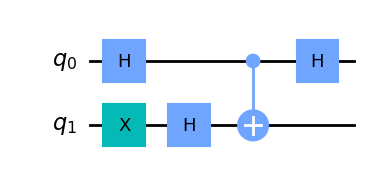

In [109]:
from qiskit import *
import numpy as np
from qiskit.quantum_info import Statevector

dutsch=QuantumCircuit(2)
dutsch.h(0)
dutsch.x(1)
dutsch.h(1)
dutsch.cx(0,1)
dutsch.h(0)
dutsch.draw('mpl')


In [110]:
state=Statevector.from_int(0,2**2)
state.draw('latex')
state1=state.evolve(dutsch)
state1.draw('latex')

<IPython.core.display.Latex object>

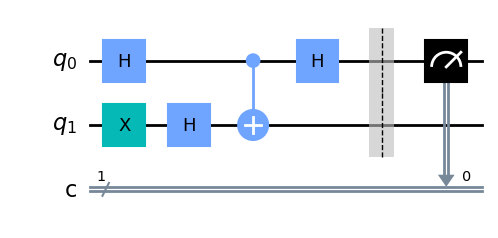

In [111]:
meas = QuantumCircuit(2, 1)
meas.barrier(range(2))
meas.measure(range(1),range(1))

dutsch1= meas.compose(dutsch,range(2), front=True)
dutsch1.draw('mpl')

In [116]:
from qiskit import transpile
from qiskit_aer import AerSimulator

bk=AerSimulator()
qc_complied=transpile(dutsch1,bk)
job_sim=bk.run(qc_complied,shots=100024)
result_sim=job_sim.result()

counts=result_sim.get_counts(qc_complied)

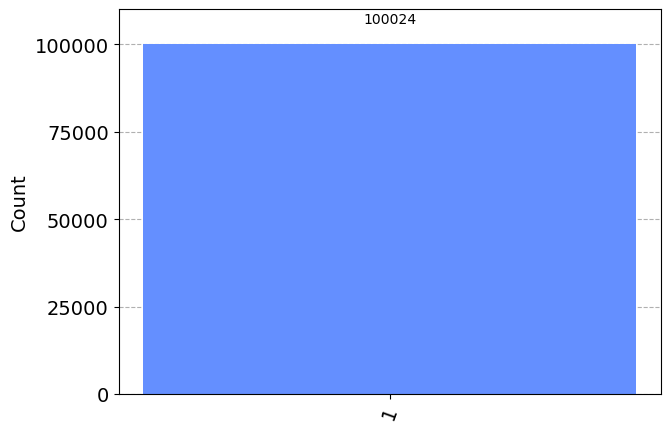

In [117]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

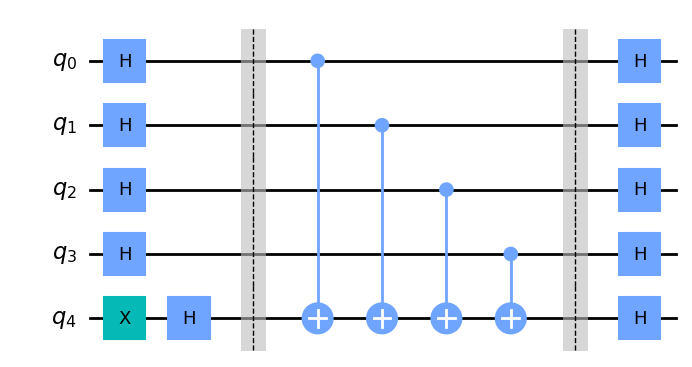

In [160]:
from qiskit import *
import numpy as np
from qiskit.quantum_info import Statevector

dutschj=QuantumCircuit(5)
dutschj.x(4)
for i in range(5):
    dutschj.h(i)
    
dutschj.barrier(range(5))
for i in range(4):
    dutschj.cx(i,4)
dutschj.barrier(range(5))

for i in range(5):
    dutschj.h(i)   
    
    
dutschj.draw('mpl')

In [161]:
state=Statevector.from_int(0,2**5)
state.draw('latex')
state1=state.evolve(dutsch)
state1.draw('latex')

<IPython.core.display.Latex object>

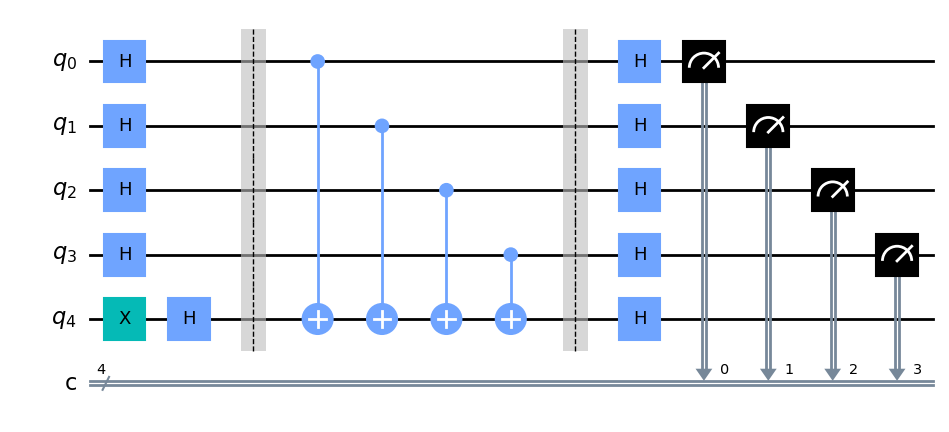

In [167]:
meas = QuantumCircuit(5,4)
# meas.barrier(range(2))
meas.measure(range(4),range(4))

dutschj1= meas.compose(dutschj,range(5), front=True)
dutschj1.draw('mpl')

In [177]:
from qiskit import transpile
from qiskit_aer import AerSimulator

bk=AerSimulator()
qc_complied=transpile(dutschj1,bk)
job_sim=bk.run(qc_complied,shots=1024)
result_sim=job_sim.result()

counts=result_sim.get_counts(qc_complied)
print(counts)

{'1111': 1024}


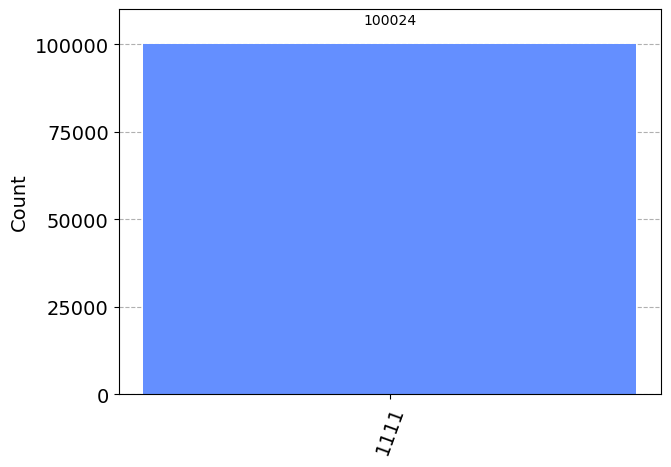

In [169]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [176]:
j=0
for i in range(2**10):
    if i==0 or bin(i).count('1')%2==0:
        j=j+1
print(2**10/2)
print(j) 

512.0
512


In [289]:
from qiskit import *
import numpy as np
from qiskit.quantum_info import Statevector



def grove():
    N=3
    grove=QuantumCircuit(N)

    grove.x(2)
    for i in range(N):
        grove.h(i)
        
    grove.barrier(range(N))
    grove.x(1)
    grove.ccx(0,1,2)
    grove.x(1)

    for i in range(N-1):
        grove.h(i)
        grove.x(i)
        
    grove.h(1)
    grove.cx(0,1)
    grove.h(1)


    for i in range(N-1):
        grove.x(i)
        grove.h(i)

    grove.barrier(range(N))

    return grove

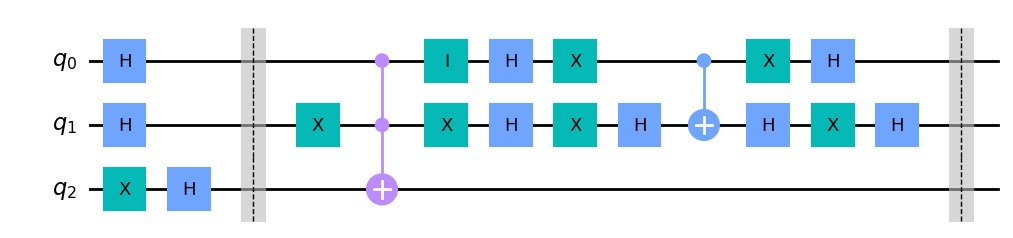

In [288]:
grove().draw('mpl')

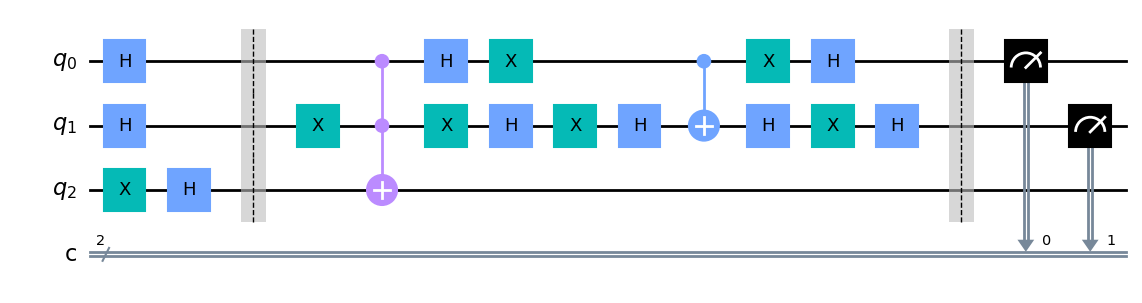

In [293]:
state=Statevector.from_int(0,2**3)
state.draw('latex')
state1=state.evolve(grove())
state1.draw('latex')

meas = QuantumCircuit(3,2)
# meas.barrier(range(2))
meas.measure(range(2),range(2))

grove1= meas.compose(grove(),range(3), front=True)
grove1.draw('mpl')

In [295]:
from qiskit import transpile
from qiskit_aer import AerSimulator

bk=AerSimulator()
qc_complied=transpile(grove1,bk)
job_sim=bk.run(qc_complied,shots=1024)
result_sim=job_sim.result()

counts=result_sim.get_counts(qc_complied)

print(counts)

{'01': 1024}


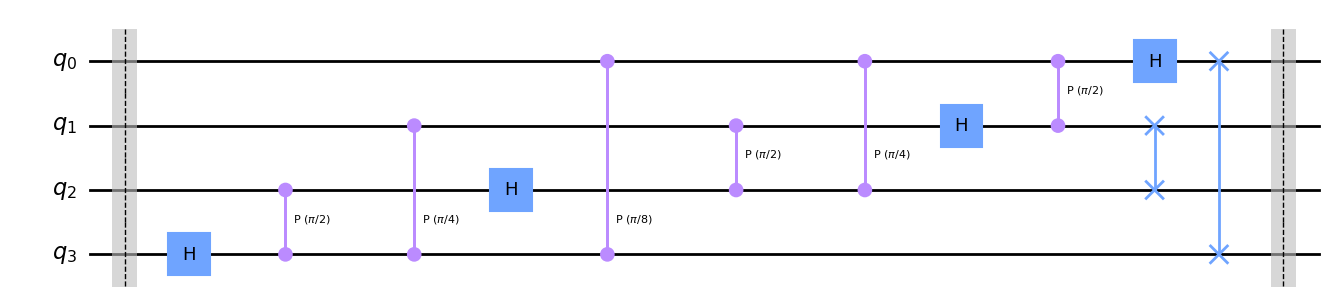

In [31]:
from qiskit import *
import numpy as np
from qiskit.quantum_info import Statevector



def QFT(N):
    qft=QuantumCircuit(N)
    
    qft.barrier(range(N))
    for i in range(N):
        ctd=N-i-1
        qft.h(ctd)
        for j in range(ctd):
            ct=ctd-j-1
            if ct>=0 and ct<N-1:
                th=np.pi/(2**np.abs(ctd-ct))
                qft.cp(th,ct,ctd)
            qft.barrier(ResourceWarning)

    for i in range(N):
        if i<=N/2-1:
            qft.swap(i,N-i-1)
    qft.barrier(range(N))
    
    return qft

QFT(4).draw('mpl')

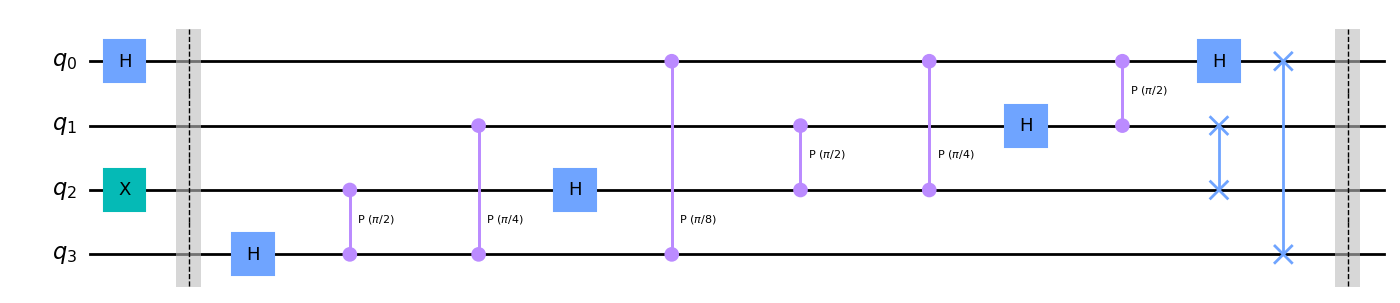

In [32]:
N=4
init=QuantumCircuit(N)
init.h(0)
init.x(2)
qftn=QuantumCircuit.compose(init,QFT(N))

qftn.draw('mpl')

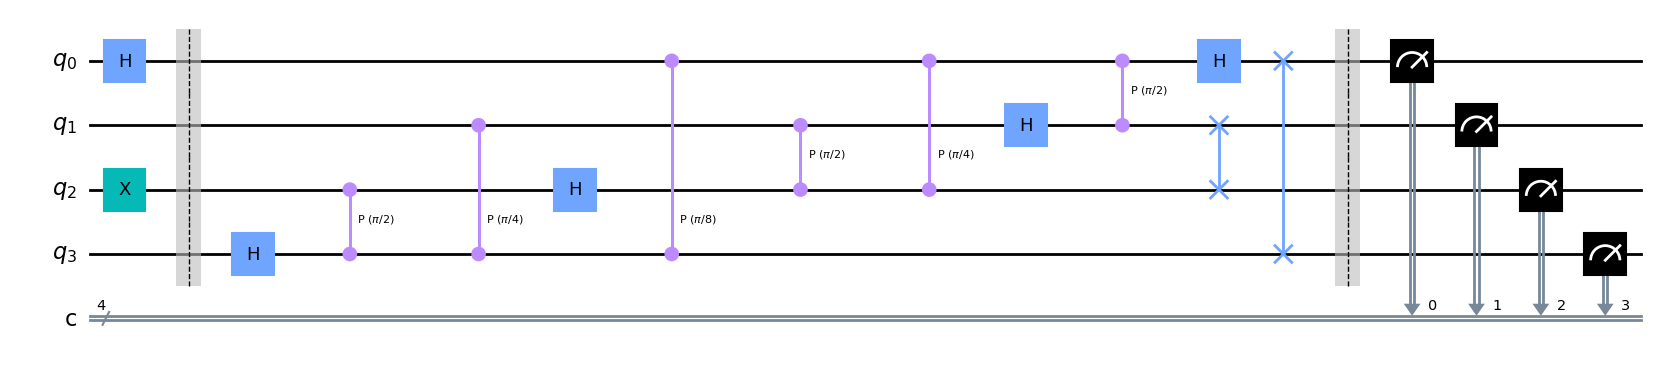

In [33]:
ms = QuantumCircuit(N,N)
# meas.barrier(range(2))
ms.measure(range(N),range(N))

qftn1= ms.compose(qftn,range(N), front=True)
qftn1.draw('mpl')

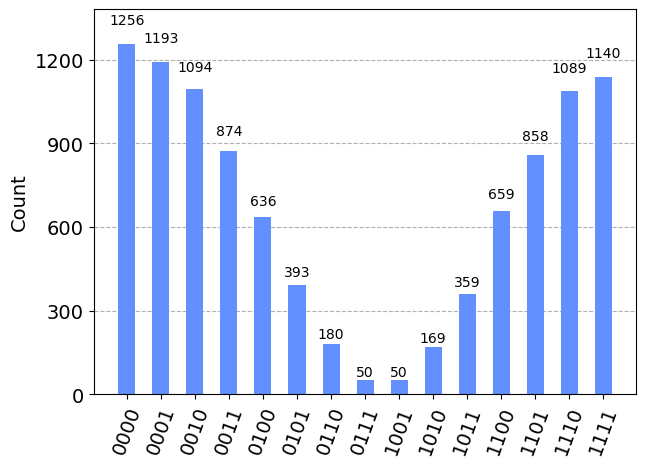

In [34]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

bk=AerSimulator()
qc_complied=transpile(qftn1,bk)
job_sim=bk.run(qc_complied,shots=10000)
result_sim=job_sim.result()

counts=result_sim.get_counts(qc_complied)
plot_histogram(counts)

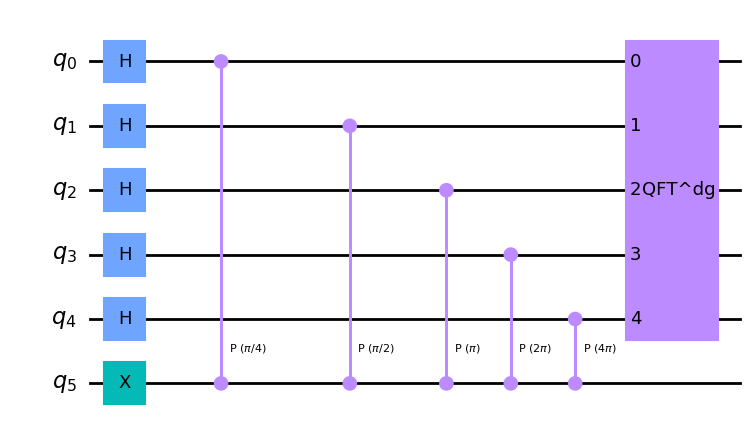

In [350]:
from qiskit import *
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT,HGate,TGate


def QPE(N,phi=0.125):
    qpe=QuantumCircuit(N)
    qft=QFT(N-1,inverse=True,name='QFT^dg')

    
    for i in range(N-1):
        qpe.h(i)
    qpe.x(N-1)

    for i in range(N-1):
        qpe.cp(2*np.pi*phi*2**i,i,N-1)
        
    qpe.append(qft,range(N-1))
    
    return qpe

QPE(6).draw('mpl')


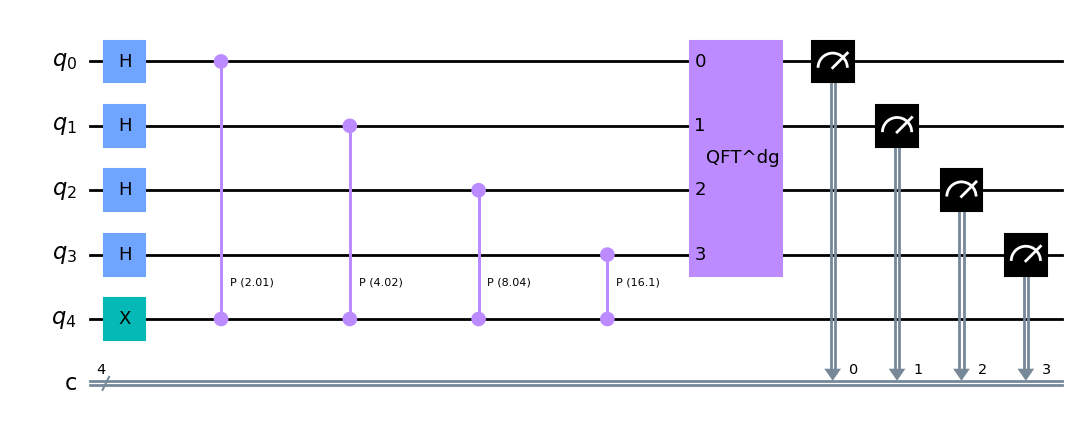

In [351]:
N=5
ms = QuantumCircuit(N,N-1)
# meas.barrier(range(2))
ms.measure(range(N-1),range(N-1))

qpe1= ms.compose(QPE(N,0.32),range(N), front=True)
qpe1.draw('mpl')

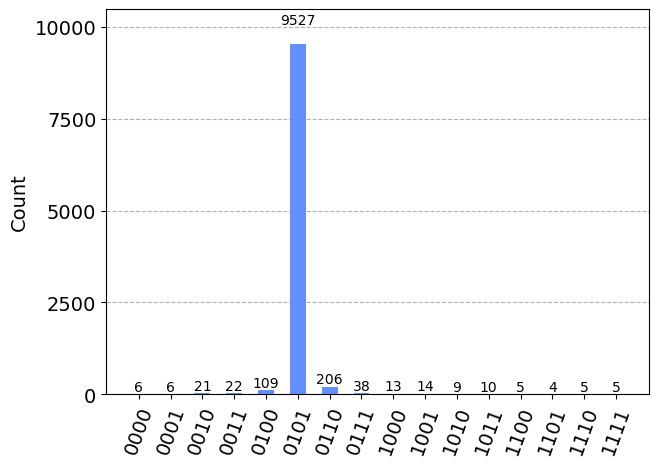

In [353]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

bk=AerSimulator()
qc_complied=transpile(qpe1,bk)
job_sim=bk.run(qc_complied,shots=10000)
result_sim=job_sim.result()

counts=result_sim.get_counts(qc_complied)
plot_histogram(counts)

In [355]:
dict = counts
key_max = max(dict.items(), key=lambda x: x[1])
print(dict[key_max[0]]/10000)
print(key_max[0])

phi1=int(key_max[0],2)/2**(N-1)
dlt=abs(phi1-0.32)
print(phi1,dlt,1/2**(N))


0.9527
0101
0.3125 0.007500000000000007 0.03125
